## Realimentación de Estados usando la Ecuación de Lyapunov

by: Sergio Andres Castaño Giraldo

 https://controlautomaticoeducacion.com/
 
 
La realimentación de estados es posible realizarla resolviendo un sistema de ecuaciones utilizando una ecuación simular a la ecuación de Lyapunov.

Resolver la siguiente ecuación con el fin de encontrar una matriz de transformación de similitud que se adapte a cualquier vector de ganancias establecido:

$$\mathbf{A}-\mathbf{B}\mathbf{K}=\mathbf{T}\mathbf{F}\mathbf{T}^{-1}$$

# Librerias

In [1]:
from scipy import signal
import scipy.linalg as la
import matplotlib.pyplot as plt
import numpy as np

# install control 
# https://python-control.readthedocs.io/en/latest/intro.html
try:
    from control.matlab import *
except:
    !pip install slycot   
    !pip install control
    #conda install -c conda-forge control
    # restart kernel if this doesn't import
    from control.matlab import *

# Ejemplo

Tomando un sistema en la forma FCC:

$\dot{\vec{x}}=\begin{bmatrix}
0 & 1\\
1 & 0
\end{bmatrix}\vec{x}+\begin{bmatrix}
1\\
0
\end{bmatrix}u$

In [2]:
# Sistema
A = np.array([[0,1],[1,0]]);
b = np.array([[1],[0]]);
c = np.array([1, 0]);

#Sistema en Espacio de Estados
sys=ss(A,b,c,0);
#sys = signal.StateSpace(A,b,c,0);
#sys = StateSpace(A,b,c,0);

#Controlabilidad
Co = ctrb(A,b)
#Rango de la matriz de controlabilidad
print(np.linalg.matrix_rank(Co))

2


La ecuación característica del sistema es:

$\Delta(\lambda)=\lambda^2-1$

In [3]:
#Ecuación característica del Sistema
E_Ca = la.eig(A);
print(E_Ca[0])

[ 1.+0.j -1.+0.j]


Definimos una ecuación característica deseada

$\Delta_f(\lambda)=\lambda^2+7\lambda+3$

In [4]:
Ps= [1, 7, 3];
Ed=np.roots(Ps)
print(Ed)

[-6.54138127 -0.45861873]


# Procedimiento

1. Escoger una ecuación característica deseada para el sistema en lazo cerrado $\Delta_f(s)$ y determinar una matriz $\mathbf{F}$ de forma que:

$\Delta_f(s)=det(s\mathbf{I}-\mathbf{F})$

In [5]:
F = np.array([[0,1],[-3,-7]]);

2. Escoger una matriz $\bar{\mathbf{K}}\in \Re^{p\times n}$ tal que el par ($\mathbf{F},\bar{\mathbf{K}}$) sea observable.

In [6]:
k_bar=np.array([0 ,1]);

Ahora debo hacer que el par ($\mathbf{F},\bar{\mathbf{K}}$) sea observable

$rank\begin{bmatrix}
\bar{\mathbf{K}} \\ \mathbf{F}\bar{\mathbf{K}}
\end{bmatrix}=
rank\begin{bmatrix}
0&1 \\ -3 & -7
\end{bmatrix}=2$

3. Determinar una matriz $\mathbf{T}$ a través de la siguiente ecuación:

$\mathbf{A}\mathbf{T}-\mathbf{T}\mathbf{F}=\mathbf{B}\bar{\mathbf{K}}$

In [7]:
Aeq = np.array([[0, 3, 1, 0], [-1, 7, 0, 1], [1, 0, 0, 3], [0, 1, -1, 7]])
Beq = np.array([0,1,0,0])
t = la.solve(Aeq, Beq)
T = np.array([[t[0],t[1]],[t[2],t[3]]]);
print(T)

[[ 0.36363636  0.21212121]
 [-0.63636364 -0.12121212]]


4. Obtener la ganancia de realimentación de estados por la relación:

$\mathbf{K}=\bar{\mathbf{K}}\mathbf{T}^{-1}$

In [8]:
iT = la.inv(T);
k1 = k_bar@iT;
# k1 = np.dot(k_bar,la.inv(T));
print(k1)

[7. 4.]


# Lazo cerrado

In [9]:
Af=A-b*k1
Ef = la.eig(Af);
print(Ef[0])

[-6.54138127+0.j -0.45861873+0.j]


In [10]:
#Condicion inicial
x0=[1, 1];

In [11]:
#Sistema con realimentación en espacio de estados
slc=ss(Af,b,c,0);

Text(0, 0.5, 'Lazo Cerrado (CI)')

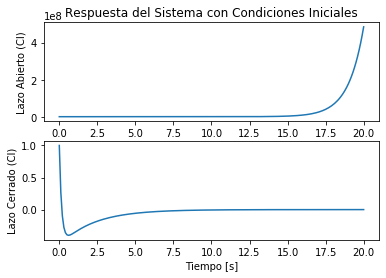

In [12]:
#Respuesta del sistema
ts = linspace(0,20,200);
yi, t = initial(sys, ts, x0)
plt.figure(1)
plt.subplot(211)
plt.plot(t,yi)
plt.title('Respuesta del Sistema con Condiciones Iniciales');
plt.xlabel('Tiempo [s]')
plt.ylabel('Lazo Abierto (CI)')

yi, t = initial(slc, ts, x0)
plt.subplot(212)
plt.plot(t,yi)
plt.xlabel('Tiempo [s]')
plt.ylabel('Lazo Cerrado (CI)')


Text(0, 0.5, 'Lazo Cerrado (CI)')

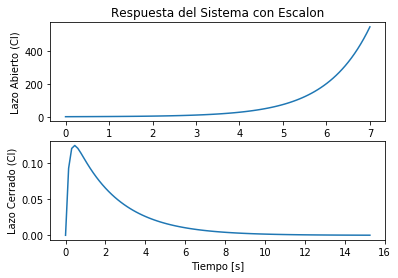

In [13]:
yi, t = step(sys)
plt.figure(2)
plt.subplot(211)
plt.plot(t,yi)
plt.title('Respuesta del Sistema con Escalon');
plt.xlabel('Tiempo [s]')
plt.ylabel('Lazo Abierto (CI)')

yi, t = step(slc)
plt.subplot(212)
plt.plot(t,yi)
plt.xlabel('Tiempo [s]')
plt.ylabel('Lazo Cerrado (CI)')